# 1. Fourier transform

### 1.1 Generate a discrete signal that has 64 samples

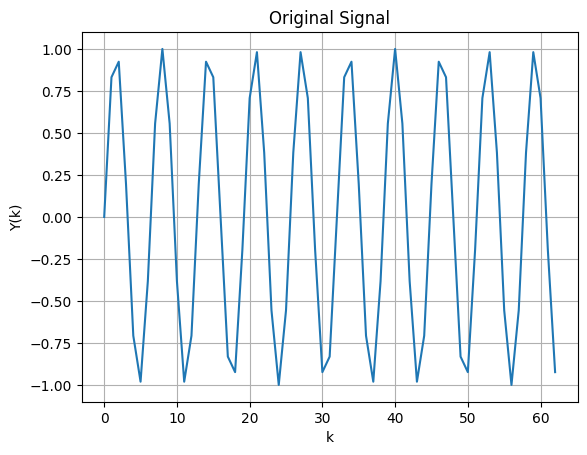

In [35]:
import numpy as np
import matplotlib.pyplot as plt

n = 64
T = 1/128
k = np.arange(0, n-1)
f = np.sin(2*np.pi*20*k*T)
plt.plot(k, f)
plt.grid(True)
plt.title('Original Signal')
plt.xlabel('k')
plt.ylabel('Y(k)')
plt.show()

### 1.2

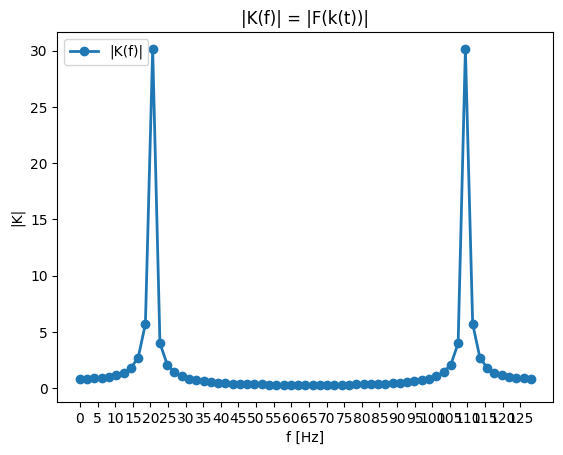

In [41]:
def plotFrequencyGraph(sampling_frequencies):
    T = 1 / sampling_frequencies
    f = np.sin(2 * np.pi * 20 * k * T)
    F = np.fft.fft(f)
    frequencies = np.linspace(0, sampling_frequencies, len(F))
    x_axis = np.arange(0, sampling_frequencies, step=5)
    plt.plot(frequencies, np.abs(F), label="|K(f)|", lw=2, marker='o')
    plt.xlabel("f [Hz]")
    plt.ylabel("|K|")
    plt.title(r"|K(f)| = |F(k(t))|")
    plt.xticks(x_axis)
    plt.legend()
    plt.show()

plotFrequencyGraph(128)

### 1.2

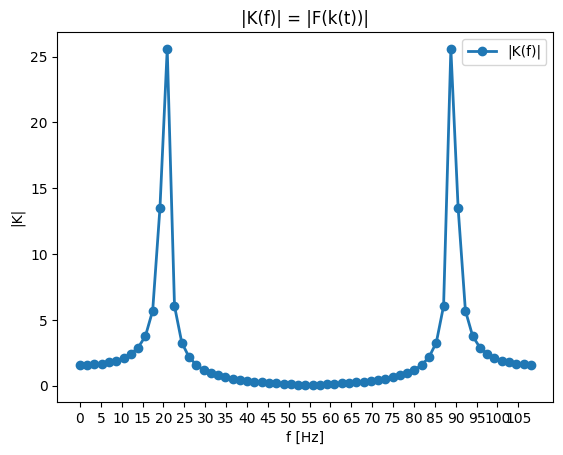

In [47]:
plotFrequencyGraph(108)

### 1.2 Continue

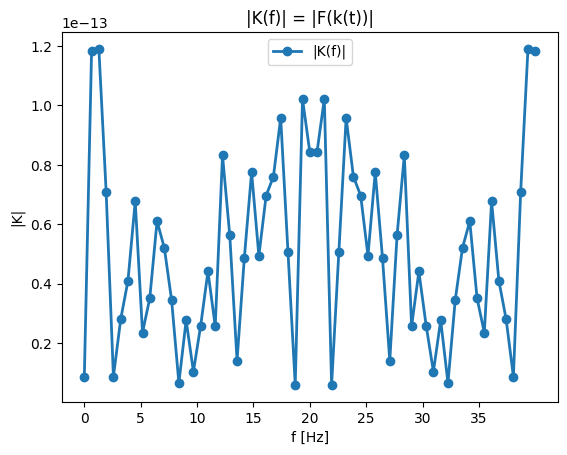

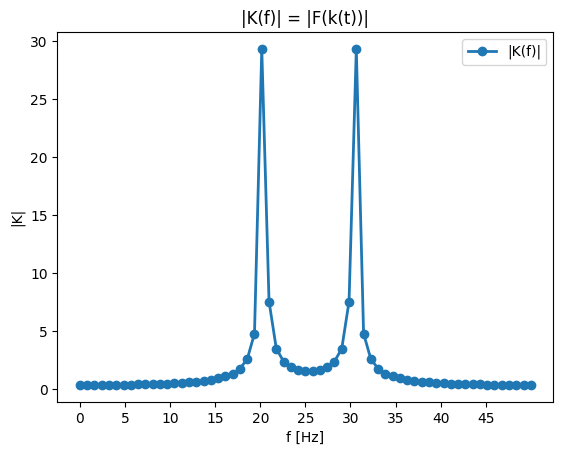

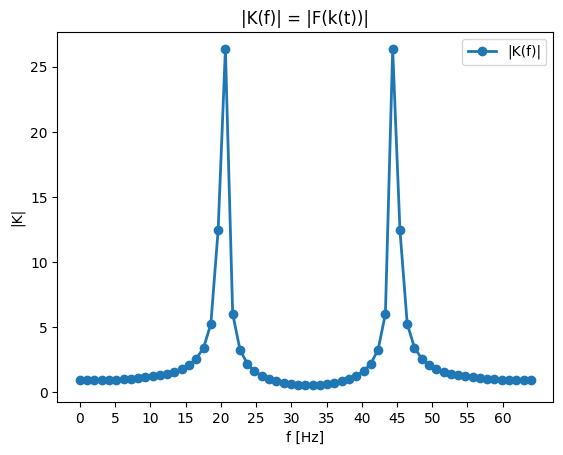

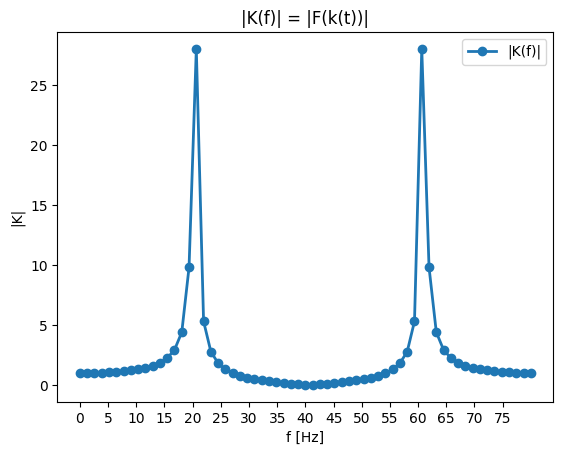

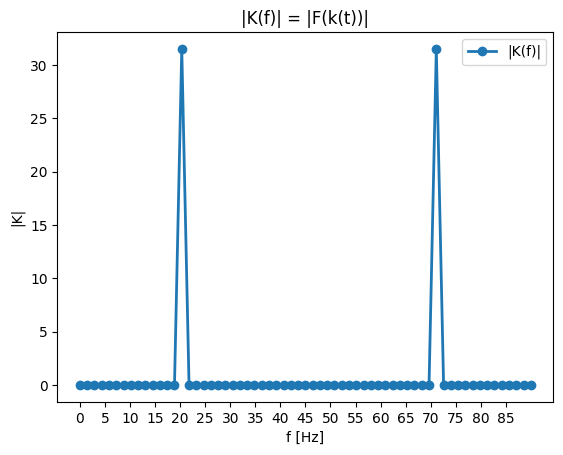

In [51]:
plots = [plotFrequencyGraph(40),plotFrequencyGraph(50),plotFrequencyGraph(64),plotFrequencyGraph(80),plotFrequencyGraph(90)]

### 1.3

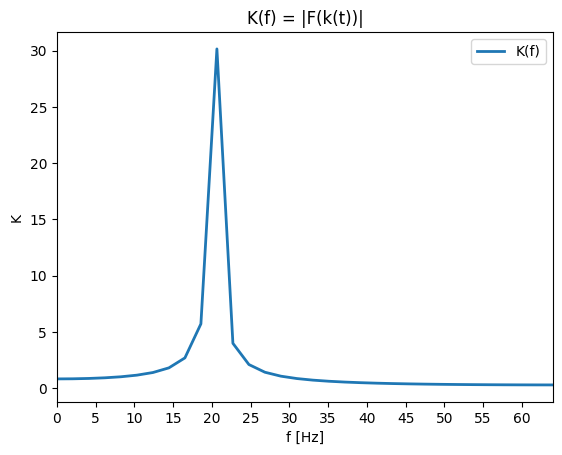

In [54]:
max_frequency = 1/T
f = np.sin(2 * np.pi * 20 * k * T)
F = np.fft.fft(f)
frequencies = np.linspace(0, max_frequency, len(F))
x_axis = np.arange(0, max_frequency, step=5)
plt.plot(frequencies, np.abs(F), label="K(f)", lw=2)
plt.xlabel("f [Hz]")
plt.ylabel("K")
plt.title(r"K(f) = |F(k(t))|")
plt.xticks(x_axis)
plt.xlim(0, max_frequency / 2)
plt.legend()
plt.show()


### 1.4

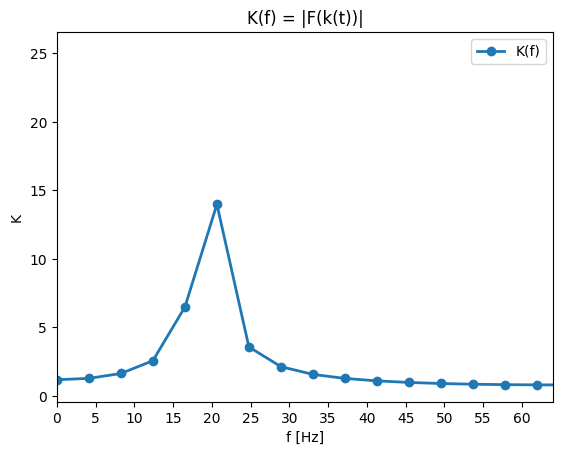

In [68]:
T = 1/128
max_frequency = 1 / T
f = np.sin(2 * np.pi * 19 * k * T)
F = np.fft.fft(f)
frequencies = np.linspace(0, max_frequency, len(F))
x_axis = np.arange(0, max_frequency, step=5)

plt.plot(frequencies[::2], np.abs(F[::2]), label="K(f)", lw=2, linestyle='-', marker='o')
plt.xlabel("f [Hz]")
plt.ylabel("K")
plt.title(r"K(f) = |F(k(t))|")
plt.xticks(x_axis)
plt.xlim(0, max_frequency / 2)
plt.legend()
plt.show()